In [5]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

from part1_nn_lib import LinearLayer

--- Epoch 0 ---
MSE: 7698.683746460612
W: [[1.85587656]] b: [0.00815885]
--- Epoch 20000 ---
MSE: 95.8535319435995
W: [[2.70771715]] b: [10.76157965]
--- Epoch 40000 ---
MSE: 53.15555956289476
W: [[2.61025025]] b: [17.22638453]
--- Epoch 60000 ---
MSE: 37.67950687337056
W: [[2.55157113]] b: [21.11846577]
--- Epoch 80000 ---
MSE: 32.07014901643382
W: [[2.51624385]] b: [23.46166043]

Results:
MSE: 30.037073239665894
a: [[2.49497618]] b: [24.87230686]


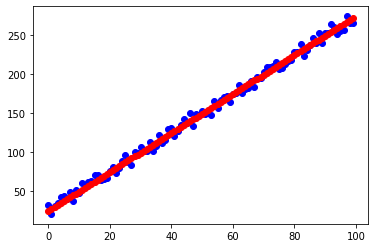

In [6]:
## y = a*x + b

# Modify these
epochs = 100000
number_of_epoch_results_to_print = 5
learning_rate = 1e-4
a = 2.5
b = 25

# Create linear data set with some noise
x = np.arange(0, 100)
noise = np.random.uniform(-10, 10, x.size)
y_gold = a * x + b + noise
plt.scatter(x, y_gold, c="b")

# Ensure that x and y have the expected format
x = x[:, np.newaxis]
y_gold = y_gold[:, np.newaxis]

layer = LinearLayer(n_in=1, n_out=1)
for epoch in range(epochs):
    y_pred = layer(x)
    grad_mse_wrt_ouputs = (y_pred - y_gold) / len(y_gold)
    grad_loss_wrt_inputs = layer.backward(grad_mse_wrt_ouputs)
    layer.update_params(learning_rate)

    if epoch % (epochs//number_of_epoch_results_to_print) == 0:
        print(f"--- Epoch {epoch} ---")
        print("MSE:", np.square(y_pred - y_gold).mean())
        print("W:", layer._W, "b:", layer._b)

print("\nResults:")
print("MSE:", np.square(y_pred - y_gold).mean())
print("a:", layer._W, "b:", layer._b)

# Plot best fit line on top of data
plt.scatter(x, y_pred, c="r")
plt.show()

In [7]:
## 2 input features (3 including bias), one output feature

# Modify these
epochs = 100000
number_of_epoch_results_to_print = 5
learning_rate = 1e-3
weights = np.array([4, 2.5, 1.5])


# Create random data
seed = 60012
rg = default_rng(seed)
n_samples = 100
x = rg.random((n_samples, 2)) * 10.0
x = np.hstack((x, np.ones((n_samples, 1))))
y = np.matmul(x, weights)

# Add noise to y
noise = rg.standard_normal(y.shape)
y = y + noise

# Split data set into train and test
x_train = np.array(x[:80, :2])
y_train = y[:80, np.newaxis]
x_test = x[80:, :2]
y_test = y[80:, np.newaxis]

layer = LinearLayer(n_in=2, n_out=1)
for epoch in range(epochs):
    y_pred = layer(x_train)
    grad_sse_wrt_ouputs = (y_pred - y_train) / len(y_train)
    grad_loss_wrt_inputs = layer.backward(grad_sse_wrt_ouputs)
    layer.update_params(learning_rate)

    if epoch % (epochs//number_of_epoch_results_to_print) == 0:
        print(f"--- Epoch {epoch} ---")
        print("MSE:", np.square(y_pred - y_train).mean())
        print("W:", layer._W, "b:", layer._b)

print("\nResults:")
print("MSE (training set):", np.square(layer(x_train) - y_train).mean())
print("MSE (test set):", np.square(layer(x_test) - y_test).mean())
print("W:", layer._W, "b:", layer._b)

--- Epoch 0 ---
MSE: 2279.556843591915
W: [[-0.40275759]
 [-0.39920049]] b: [0.0449523]
--- Epoch 20000 ---
MSE: 1.2743672587491033
W: [[4.00629996]
 [2.54672523]] b: [1.23411952]
--- Epoch 40000 ---
MSE: 1.2739383917058238
W: [[4.00111169]
 [2.54320341]] b: [1.28865781]
--- Epoch 60000 ---
MSE: 1.2739344919976563
W: [[4.00061695]
 [2.54286757]] b: [1.29385844]
--- Epoch 80000 ---
MSE: 1.2739344565374275
W: [[4.00056977]
 [2.54283555]] b: [1.29435436]

Results:
MSE (training set): 1.273934456214986
MSE (test set): 1.037436284677724
W: [[4.00056527]
 [2.5428325 ]] b: [1.29440165]
